# Time Series Forecasting using Prophet Model

The explotarory data analysis has already been done for Holt Winter's model. Therefore, I will skip that part here.

### Load packages

In [1]:
import pandas as pd          
import numpy as np          
import matplotlib.pyplot as plt  
from datetime import datetime    
from pandas import Series        
import warnings                   # To ignore the warnings
warnings.filterwarnings("ignore")
from fbprophet import Prophet

### Importing data

In [2]:
train=pd.read_csv("Train_SU63ISt.csv")
test=pd.read_csv("Test_0qrQsBZ.csv")

### Change datetime format

In [3]:
train['Datetime'] = pd.to_datetime(train['Datetime'],format='%d-%m-%Y %H:%M') 
test['Datetime'] = pd.to_datetime(test['Datetime'],format='%d-%m-%Y %H:%M')
train['hour'] = train.Datetime.dt.hour

In [4]:
# Calculate average hourly fraction
hourly_frac = train.groupby(['hour']).mean()/np.sum(train.groupby(['hour']).mean())
hourly_frac.drop(['ID'], axis = 1, inplace = True)
hourly_frac.columns = ['fraction']


# convert to time series from dataframe
train.index = train.Datetime
train.drop(['ID','hour','Datetime'], axis = 1, inplace = True)

daily_train = train.resample('D').sum()

In [5]:
train.shape

(18288, 1)

In [6]:
test.shape

(5112, 2)

### Model Creation

In [7]:
daily_train['ds'] = daily_train.index
daily_train['y'] = daily_train.Count
daily_train.drop(['Count'],axis = 1, inplace = True)

In [8]:
daily_train.head()

,ds,y
Datetime,,
2012-08-25,2012-08-25,76
2012-08-26,2012-08-26,88
2012-08-27,2012-08-27,62
2012-08-28,2012-08-28,58
2012-08-29,2012-08-29,60


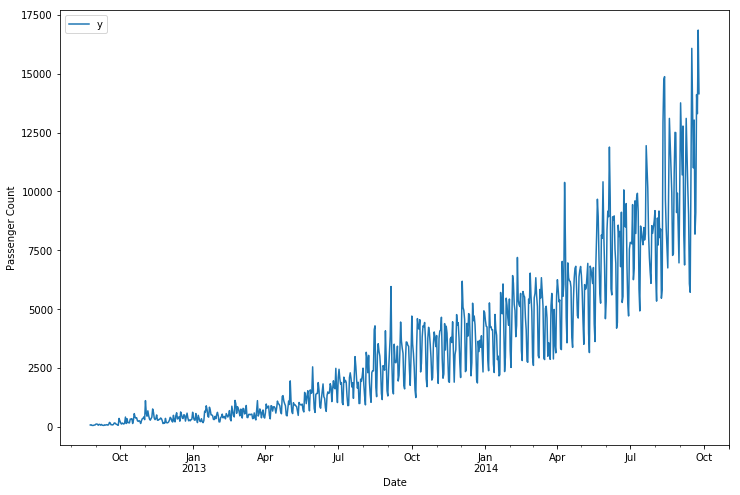

In [9]:
ax = daily_train.set_index('ds').plot(figsize=(12, 8))
ax.set_ylabel('Passenger Count')
ax.set_xlabel('Date')

plt.show()

### Prophet Model

In [10]:
model = Prophet(interval_width=0.95, yearly_seasonality = True, seasonality_prior_scale=0.1)

In [11]:
model.fit(daily_train)

INFO:fbprophet.forecaster:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [12]:
future = model.make_future_dataframe(periods = 213)

In [13]:
forecast = model.predict(future)

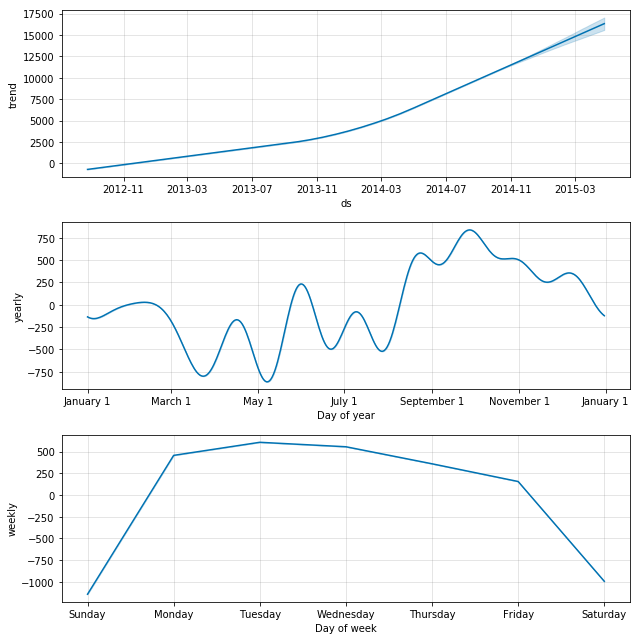

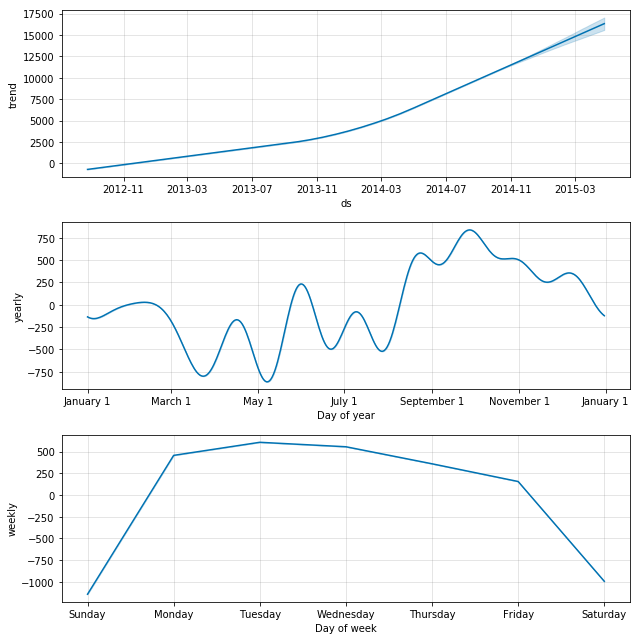

In [14]:
model.plot_components(forecast)